<a href="https://colab.research.google.com/github/Nohyunjin/DeepLearning/blob/main/ResNet_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [13]:
train_X.shape

(50000, 32, 32, 3)

In [7]:
NUM_CLASSES = 10

(train_X, train_y), (test_X, test_y) = cifar10.load_data()
print('train_X shape:', train_X.shape)
print(test_X.shape[0], 'test samples')

input_shape = train_X.shape[1:]

train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

inputs = Input(shape = input_shape)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')
x = conv(inputs)
x = BatchNormalization()(x)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', kernel_regularizer = l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', kernel_regularizer = l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', kernel_regularizer = l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters = 32, kernel_size = 3, padding = 'same', kernel_regularizer = l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

x = AveragePooling2D(pool_size = 8)(x)
y = Flatten()(x)

y = Dense(512, activation = 'relu')(y)
outputs = Dense(NUM_CLASSES, activation = 'softmax')(y)

model = Model(inputs = inputs, outputs = outputs)
model.summary()


train_X shape: (50000, 32, 32, 3)
10000 test samples
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 32, 32, 32)  128         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv2d_6 (Conv2D)              (None, 

In [8]:
import os

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

EPOCHS = 100
BATCH_SIZE = 200

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_model-{epoch:03d}-{val_accuracy:.4f}.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', save_best_only = True, verbos = 1)

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 90:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 40:
        lr *= 1e-1
    print('Learning rate:', lr)    
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor = 'loss', patience = 5)

my_callbacks = [checkpoint, lr_scheduler, early_stopping]

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

history = model.fit(train_X, train_y, validation_data = (test_X, test_y), epochs = EPOCHS, batch_size = BATCH_SIZE, callbacks = my_callbacks)


Learning rate: 0.001
Epoch 1/100
250/250 [==============================] - 10s 33ms/step - loss: 1.4161 - accuracy: 0.5039 - val_loss: 2.8731 - val_accuracy: 0.1600 - lr: 0.0010
Learning rate: 0.001
Epoch 2/100
  1/250 [..............................] - ETA: 7s - loss: 1.1647 - accuracy: 0.5900

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


250/250 [==============================] - 8s 31ms/step - loss: 0.9753 - accuracy: 0.6630 - val_loss: 1.6456 - val_accuracy: 0.4442 - lr: 0.0010
Learning rate: 0.001
Epoch 3/100
250/250 [==============================] - 8s 31ms/step - loss: 0.8220 - accuracy: 0.7195 - val_loss: 0.9356 - val_accuracy: 0.6826 - lr: 0.0010
Learning rate: 0.001
Epoch 4/100
250/250 [==============================] - 8s 31ms/step - loss: 0.7244 - accuracy: 0.7540 - val_loss: 1.0911 - val_accuracy: 0.6486 - lr: 0.0010
Learning rate: 0.001
Epoch 5/100
250/250 [==============================] - 8s 31ms/step - loss: 0.6583 - accuracy: 0.7785 - val_loss: 0.7134 - val_accuracy: 0.7637 - lr: 0.0010
Learning rate: 0.001
Epoch 6/100
250/250 [==============================] - 8s 31ms/step - loss: 0.5935 - accuracy: 0.8021 - val_loss: 0.6832 - val_accuracy: 0.7713 - lr: 0.0010
Learning rate: 0.001
Epoch 7/100
250/250 [==============================] - 8s 31ms/step - loss: 0.5490 - accuracy: 0.8185 - val_loss: 0.7668 -

In [9]:
scores = model.evaluate(test_X, test_y, verbose = 1)
print('Test loss', scores[0])
print('Test accuracy', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.1579 - accuracy: 0.8300
Test loss 1.1579314470291138
Test accuracy 0.8299999833106995


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


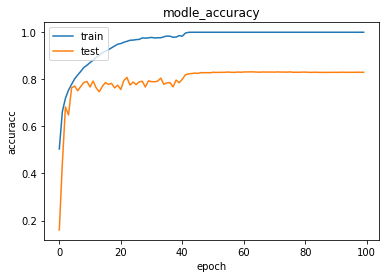

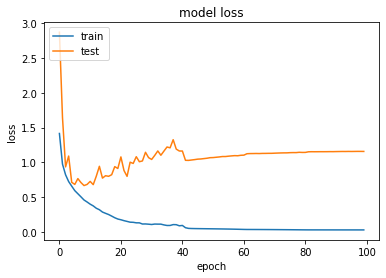

In [10]:
import matplotlib.pyplot as plt

print(history.history.keys())
# Accuracy 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modle_accuracy')
plt.ylabel('accuracc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
# Loss 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()